# A Crash Course of Machine Learning using Sklearn


### Learning Objectives

You can count it a success if you can explain the following concepts with your own language and your personal examples:

- features v.s. target

- classification v.s. regression

- supervised learning v.s. unsupervised learning

- why train test split data

- mapping-view f:X->y v.s. stat-view: p(y|X)

- tabular data v.s. non-tabular data


**References and Credits**

- [A Gentle Introduction to Machine Learning with Python and Scikit-learn](https://github.com/marcelomiky/PythonCodes/blob/master/scikit-learn/scikit-learn-book/Chapter%201%20(2nd%20ed.)%20-%20A%20Gentle%20Introduction%20to%20Machine%20Learning%20with%20Python%20and%20Scikit-learn.ipynb)

- 



**table**

- row = sample, Alex, Jasper, Paul 
- col = feature, i.e. 'color', 'weight', 'height', 'blood-pressure', 'name', ..

feature--target/label: something is not available directly/very costly, we want to predict this feature's value by other features.
tidy table

3 type of feature/variable
- categorical: 'color', 'nationality', 'race'
- numeric: 'weight', 'height', 
- string: 'home address', 'job description', 'comment'
f: X -> y
when y is categorical, f:X->y classification
when y is numeric, f: X-> regression

In [2]:
# import packages
import numpy as np # numerical array
import pandas as pd # dataframe & manipulations
import matplotlib.pyplot as plt # basic plotting
import seaborn as sns # visualization
import sklearn #for ML

# plot stuff inside this notebook
%matplotlib inline 

## EDA (explorary data analysis)

In [3]:
# load data
from sklearn import datasets

data = datasets.load_iris()
data


{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [4]:
type(data)

sklearn.utils.Bunch

In [5]:
X = data['data']

In [6]:
y = data['target']
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [7]:
df = pd.DataFrame(X, columns=data.feature_names)
df

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                  5.1               3.5                1.4               0.2
1                  4.9               3.0                1.4               0.2
2                  4.7               3.2                1.3               0.2
3                  4.6               3.1                1.5               0.2
4                  5.0               3.6                1.4               0.2
..                 ...               ...                ...               ...
145                6.7               3.0                5.2               2.3
146                6.3               2.5                5.0               1.9
147                6.5               3.0                5.2               2.0
148                6.2               3.4                5.4               2.3
149                5.9               3.0                5.1               1.8

[150 rows x 4 columns]

In [8]:
df['label'] = y # I added a column called 'label' to df
df

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                  5.1               3.5                1.4               0.2   
1                  4.9               3.0                1.4               0.2   
2                  4.7               3.2                1.3               0.2   
3                  4.6               3.1                1.5               0.2   
4                  5.0               3.6                1.4               0.2   
..                 ...               ...                ...               ...   
145                6.7               3.0                5.2               2.3   
146                6.3               2.5                5.0               1.9   
147                6.5               3.0                5.2               2.0   
148                6.2               3.4                5.4               2.3   
149                5.9               3.0                5.1               1.8   

     label  
0        0  
1        0  
2        0  
3        0  
4        0  
..     ...  
145      2  
146      2  
147      2  
148      2  
149      2  

[150 rows x 5 columns]

In [32]:
m = 5.84333
r = 7.9 - 4.3
(5.1-m)/r

-0.2064805555555556

In [9]:
df.describe(include='all').T

count      mean       std  min  25%   50%  75%  max
sepal length (cm)  150.0  5.843333  0.828066  4.3  5.1  5.80  6.4  7.9
sepal width (cm)   150.0  3.057333  0.435866  2.0  2.8  3.00  3.3  4.4
petal length (cm)  150.0  3.758000  1.765298  1.0  1.6  4.35  5.1  6.9
petal width (cm)   150.0  1.199333  0.762238  0.1  0.3  1.30  1.8  2.5
label              150.0  1.000000  0.819232  0.0  0.0  1.00  2.0  2.0

In [10]:
df.corr()

sepal length (cm)  sepal width (cm)  petal length (cm)  \
sepal length (cm)           1.000000         -0.117570           0.871754   
sepal width (cm)           -0.117570          1.000000          -0.428440   
petal length (cm)           0.871754         -0.428440           1.000000   
petal width (cm)            0.817941         -0.366126           0.962865   
label                       0.782561         -0.426658           0.949035   

                   petal width (cm)     label  
sepal length (cm)          0.817941  0.782561  
sepal width (cm)          -0.366126 -0.426658  
petal length (cm)          0.962865  0.949035  
petal width (cm)           1.000000  0.956547  
label                      0.956547  1.000000

/opt/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:1152: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(UserWarning(msg))


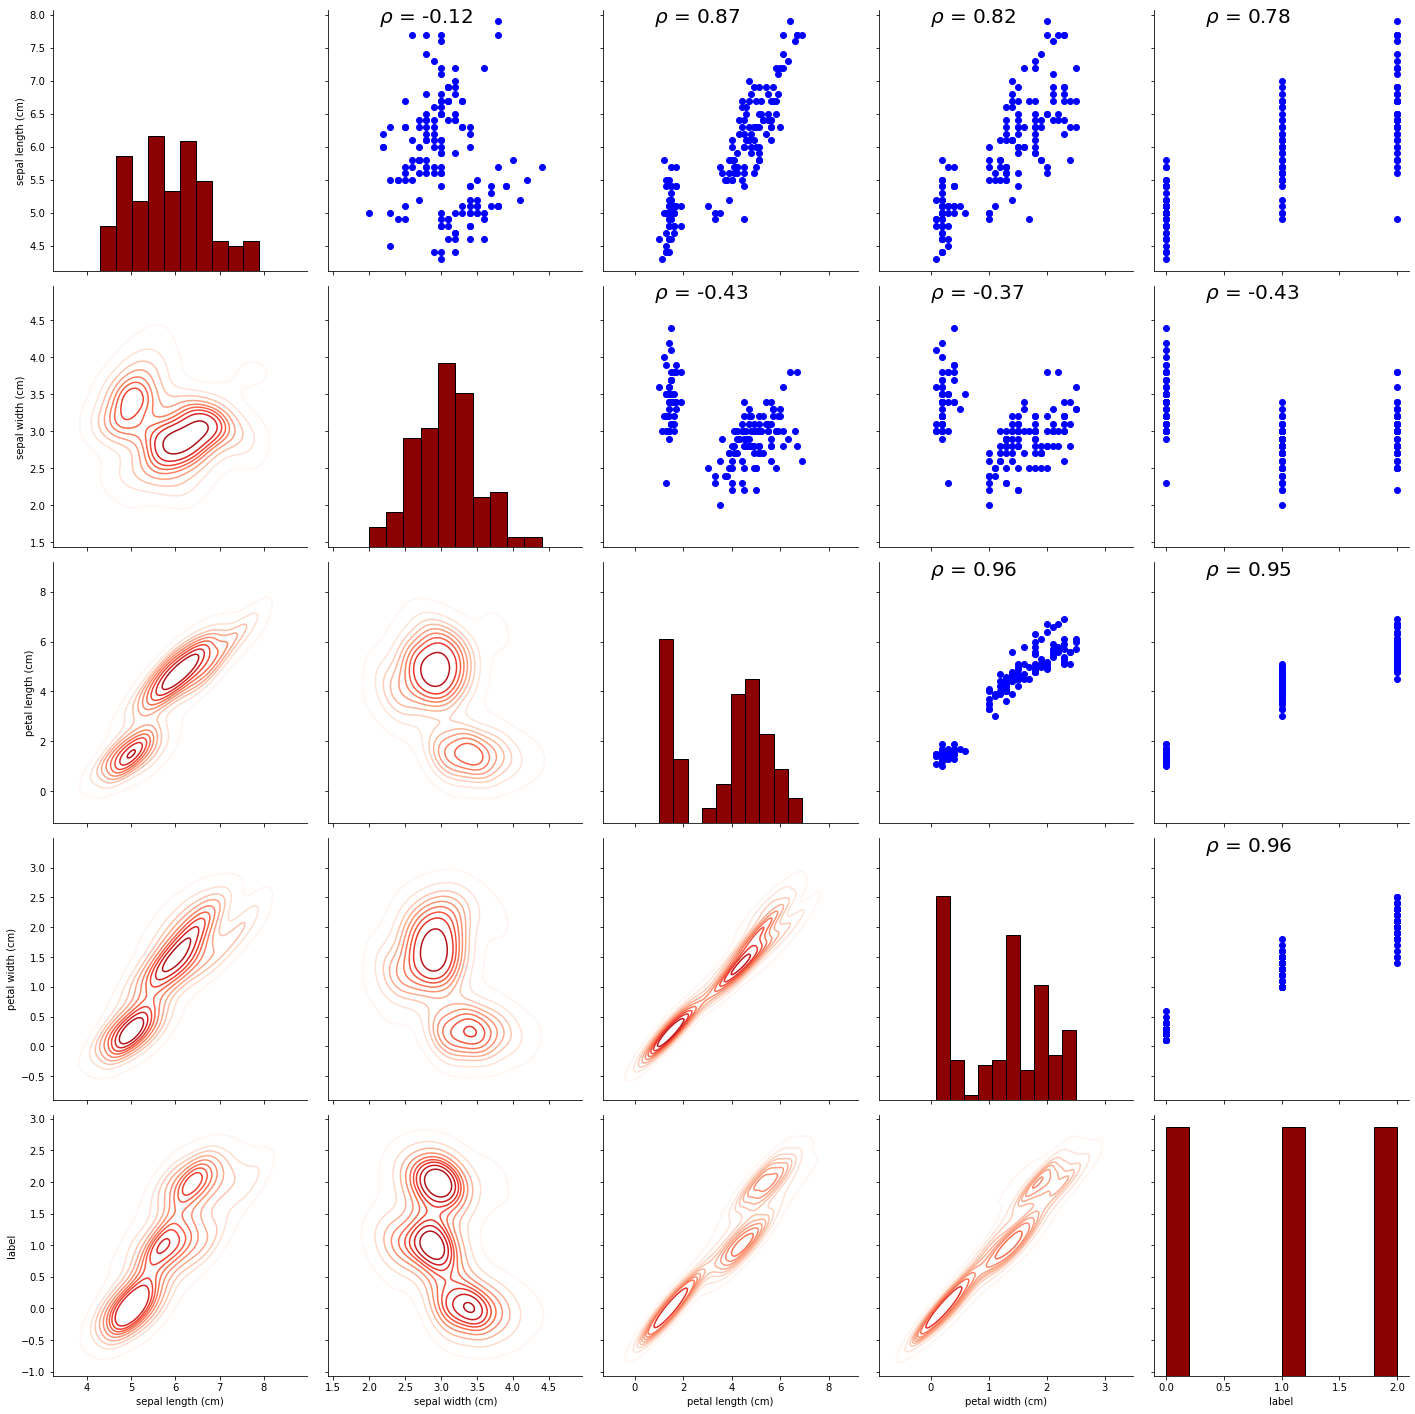

In [11]:
# helper functions

def corr(x, y, **kwargs):
    
    # Calculate the value
    coef = np.corrcoef(x, y)[0][1]
    # Make the label
    label = r'$\rho$ = ' + str(round(coef, 2))
    
    # Add the label to the plot
    ax = plt.gca()
    ax.annotate(label, xy = (0.2, 0.95), size = 20, xycoords = ax.transAxes)


def plot_pair(df, columns=None):
    """plot the pair-wise correlation of df using seaborn
    Args:
        df: dataframe
        columns: a list of column names
    Ref:
        c2w4s1_ts_WeatherData.ipynb
    Examples: 
        plot_pair(df.sample(n=1000, axis=0))
    """
    if columns:
        df1 = df[columns].copy()
    else:
        df1 = df.copy()
    # Create a pair grid instance
    import seaborn as sns
    grid = sns.PairGrid(data= df1,
                        vars = columns, size = 4)

    # Map the plots to the locations
    
    grid = grid.map_upper(corr)
    grid = grid.map_upper(plt.scatter, color = 'blue')
    grid = grid.map_lower(sns.kdeplot, cmap = 'Reds')
    grid = grid.map_diag(plt.hist, bins = 10, edgecolor =  'k', color = 'darkred');
    
plot_pair(df)

# classification f: X->categorical y



In [13]:
from sklearn.model_selection import train_test_split # split the data df into 2 parts: train and test
from sklearn.preprocessing import StandardScaler


In [14]:

# shift + tab
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=234)


In [15]:
X_train.shape

(112, 4)

In [16]:
X_test.shape

(38, 4)

In [17]:
38/(112+38)

0.25333333333333335

In [18]:
pd.DataFrame(y_train).value_counts()

2    38
0    37
1    37
dtype: int64

In [19]:
pd.DataFrame(y_test).value_counts()

0    13
1    13
2    12
dtype: int64

In [20]:
# scaling-- to make different feature more comparable to one another
scaler = StandardScaler() 
X_train = scaler.fit_transform(X_train)

In [33]:
pd.DataFrame(X_train)

0         1         2         3
0    2.211416 -0.151558  1.612097  1.139528
1   -0.774162  2.406248 -1.285416 -1.438798
2    1.091824  0.080970  0.532631  0.366030
3   -0.898561  1.708664 -1.058160 -1.052049
4   -0.525364 -0.151558  0.419003  0.366030
..        ...       ...       ...       ...
107 -0.400965 -1.546725  0.021305 -0.149635
108 -0.400965  1.011081 -1.399044 -1.309882
109 -0.027768 -0.849142  0.191747 -0.278551
110  1.091824  0.080970  1.043957  1.526277
111 -0.898561 -1.314198 -0.433207 -0.149635

[112 rows x 4 columns]

In [34]:
X_test = scaler.transform(X_test)

In [35]:
X_test

array([[-1.52055649,  0.08096952, -1.28541633, -1.30988169],
       [ 1.09182398, -1.31419755,  1.15758487,  0.75277911],
       [ 1.58942026, -0.15155833,  1.21439885,  1.139528  ],
       [-1.14735928, -1.31419755,  0.41900311,  0.62386281],
       [ 2.33581468, -0.61661402,  1.66891071,  1.01061171],
       [ 1.71381933,  0.31349736,  1.27121284,  0.75277911],
       [ 0.34542956, -0.15155833,  0.64625904,  0.75277911],
       [-0.27656579, -0.84914186,  0.24856117,  0.10819761],
       [-1.02296021,  0.77855305, -1.28541633, -1.30988169],
       [ 1.09182398, -0.15155833,  0.70307302,  0.62386281],
       [ 1.34062212,  0.08096952,  0.64625904,  0.36603021],
       [ 1.21622305, -0.15155833,  0.98714293,  1.139528  ],
       [-0.89856114,  1.47613659, -1.28541633, -1.05204909],
       [-0.89856114,  1.70866443, -1.22860235, -1.30988169],
       [-0.02776765, -0.84914186,  0.759887  ,  0.88169541],
       [-1.76935463, -0.38408617, -1.34223031, -1.30988169],
       [ 0.09663142, -0.

In [22]:
pd.DataFrame(X_train).describe().T

count          mean       std       min       25%       50%       75%  \
0  112.0 -6.046750e-17  1.004494 -1.893754 -0.805262 -0.027768  0.594228   
1  112.0  7.553482e-16  1.004494 -2.011781 -0.616614 -0.151558  0.546025   
2  112.0 -8.648836e-16  1.004494 -1.569486 -1.228602  0.276968  0.759887   
3  112.0  4.406198e-16  1.004494 -1.438798 -1.180965  0.108198  0.752779   

        max  
0  2.584613  
1  3.103831  
2  1.782539  
3  1.655193

In [36]:
# train a clf
from sklearn.linear_model import LogisticRegression

# instantiate an object
clf = LogisticRegression()

# train a clf using train-data (X_train, y_train)
clf.fit(X_train, y_train)

# make predictions on test data
y_pred = clf.predict(X_test)
y_pred

array([0, 2, 2, 1, 2, 2, 2, 1, 0, 2, 1, 2, 0, 0, 2, 0, 2, 0, 0, 2, 0, 0,
       2, 2, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1])

In [26]:
# true labels
y_test

array([0, 2, 2, 2, 2, 2, 2, 1, 0, 1, 1, 2, 0, 0, 2, 0, 2, 0, 0, 2, 0, 0,
       2, 2, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1])

In [37]:
# how do we evaluate the performance of the clf?
from sklearn.metrics import confusion_matrix, classification_report

cm = confusion_matrix(y_test, y_pred)
cm

array([[13,  0,  0],
       [ 0, 12,  1],
       [ 0,  1, 11]])

In [39]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       0.92      0.92      0.92        13
           2       0.92      0.92      0.92        12

    accuracy                           0.95        38
   macro avg       0.95      0.95      0.95        38
weighted avg       0.95      0.95      0.95        38



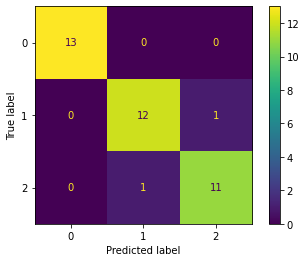

In [40]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(clf, X_test, y_test)

In [42]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
f1_score(y_test, y_pred,average='macro')

0.9465811965811967

In [43]:
y_prob = clf.predict_proba(X_test)
y_prob

array([[9.68387627e-01, 3.16118393e-02, 5.34213215e-07],
       [2.98243697e-05, 8.84072784e-02, 9.11562897e-01],
       [1.46207843e-05, 2.96001331e-02, 9.70385246e-01],
       [1.87180988e-02, 7.18933915e-01, 2.62347986e-01],
       [4.77122030e-07, 8.94487274e-03, 9.91054650e-01],
       [8.66573399e-05, 8.29736803e-02, 9.16939662e-01],
       [3.97557438e-03, 4.04719858e-01, 5.91304567e-01],
       [2.96676387e-02, 8.96247346e-01, 7.40850154e-02],
       [9.75238537e-01, 2.47610142e-02, 4.48358585e-07],
       [1.33080046e-03, 3.56596308e-01, 6.42072891e-01],
       [2.84654719e-03, 5.50604413e-01, 4.46549039e-01],
       [6.93660061e-05, 5.87845519e-02, 9.41146082e-01],
       [9.84723054e-01, 1.52764478e-02, 4.98157107e-07],
       [9.90472315e-01, 9.52753179e-03, 1.52851487e-07],
       [1.26171945e-03, 2.67580821e-01, 7.31157459e-01],
       [9.62111276e-01, 3.78881535e-02, 5.70216698e-07],
       [4.38623269e-03, 3.83547085e-01, 6.12066682e-01],
       [9.87633938e-01, 1.23658

In [46]:
np.sum(y_prob[0])

1.0

In [47]:
# regression f: X-> numeric y
from sklearn.datasets import load_boston

data = load_boston()
data

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

In [49]:
X = data.data
y = data.target

df = pd.DataFrame(X, columns=data.feature_names)
df['target'] = y
df

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0    0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1    0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2    0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3    0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4    0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...    ...   
501  0.06263   0.0  11.93   0.0  0.573  6.593  69.1  2.4786  1.0  273.0   
502  0.04527   0.0  11.93   0.0  0.573  6.120  76.7  2.2875  1.0  273.0   
503  0.06076   0.0  11.93   0.0  0.573  6.976  91.0  2.1675  1.0  273.0   
504  0.10959   0.0  11.93   0.0  0.573  6.794  89.3  2.3889  1.0  273.0   
505  0.04741   0.0  11.93   0.0  0.573  6.030  80.8  2.5050  1.0  273.0   

     PTRATIO       B  LSTAT  target  
0       15.3  396.90   4.98    24.0  
1       17.8  396.90   9.14    21.6  
2       17.8  392.83   4.03    34.7  
3       18.7  394.63   2.94    33.4  
4       18.7  396.90   5.33    36.2  
..       ...     ...    ...     ...  
501     21.0  391.99   9.67    22.4  
502     21.0  396.90   9.08    20.6  
503     21.0  396.90   5.64    23.9  
504     21.0  393.45   6.48    22.0  
505     21.0  396.90   7.88    11.9  

[506 rows x 14 columns]

/opt/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:1152: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(UserWarning(msg))


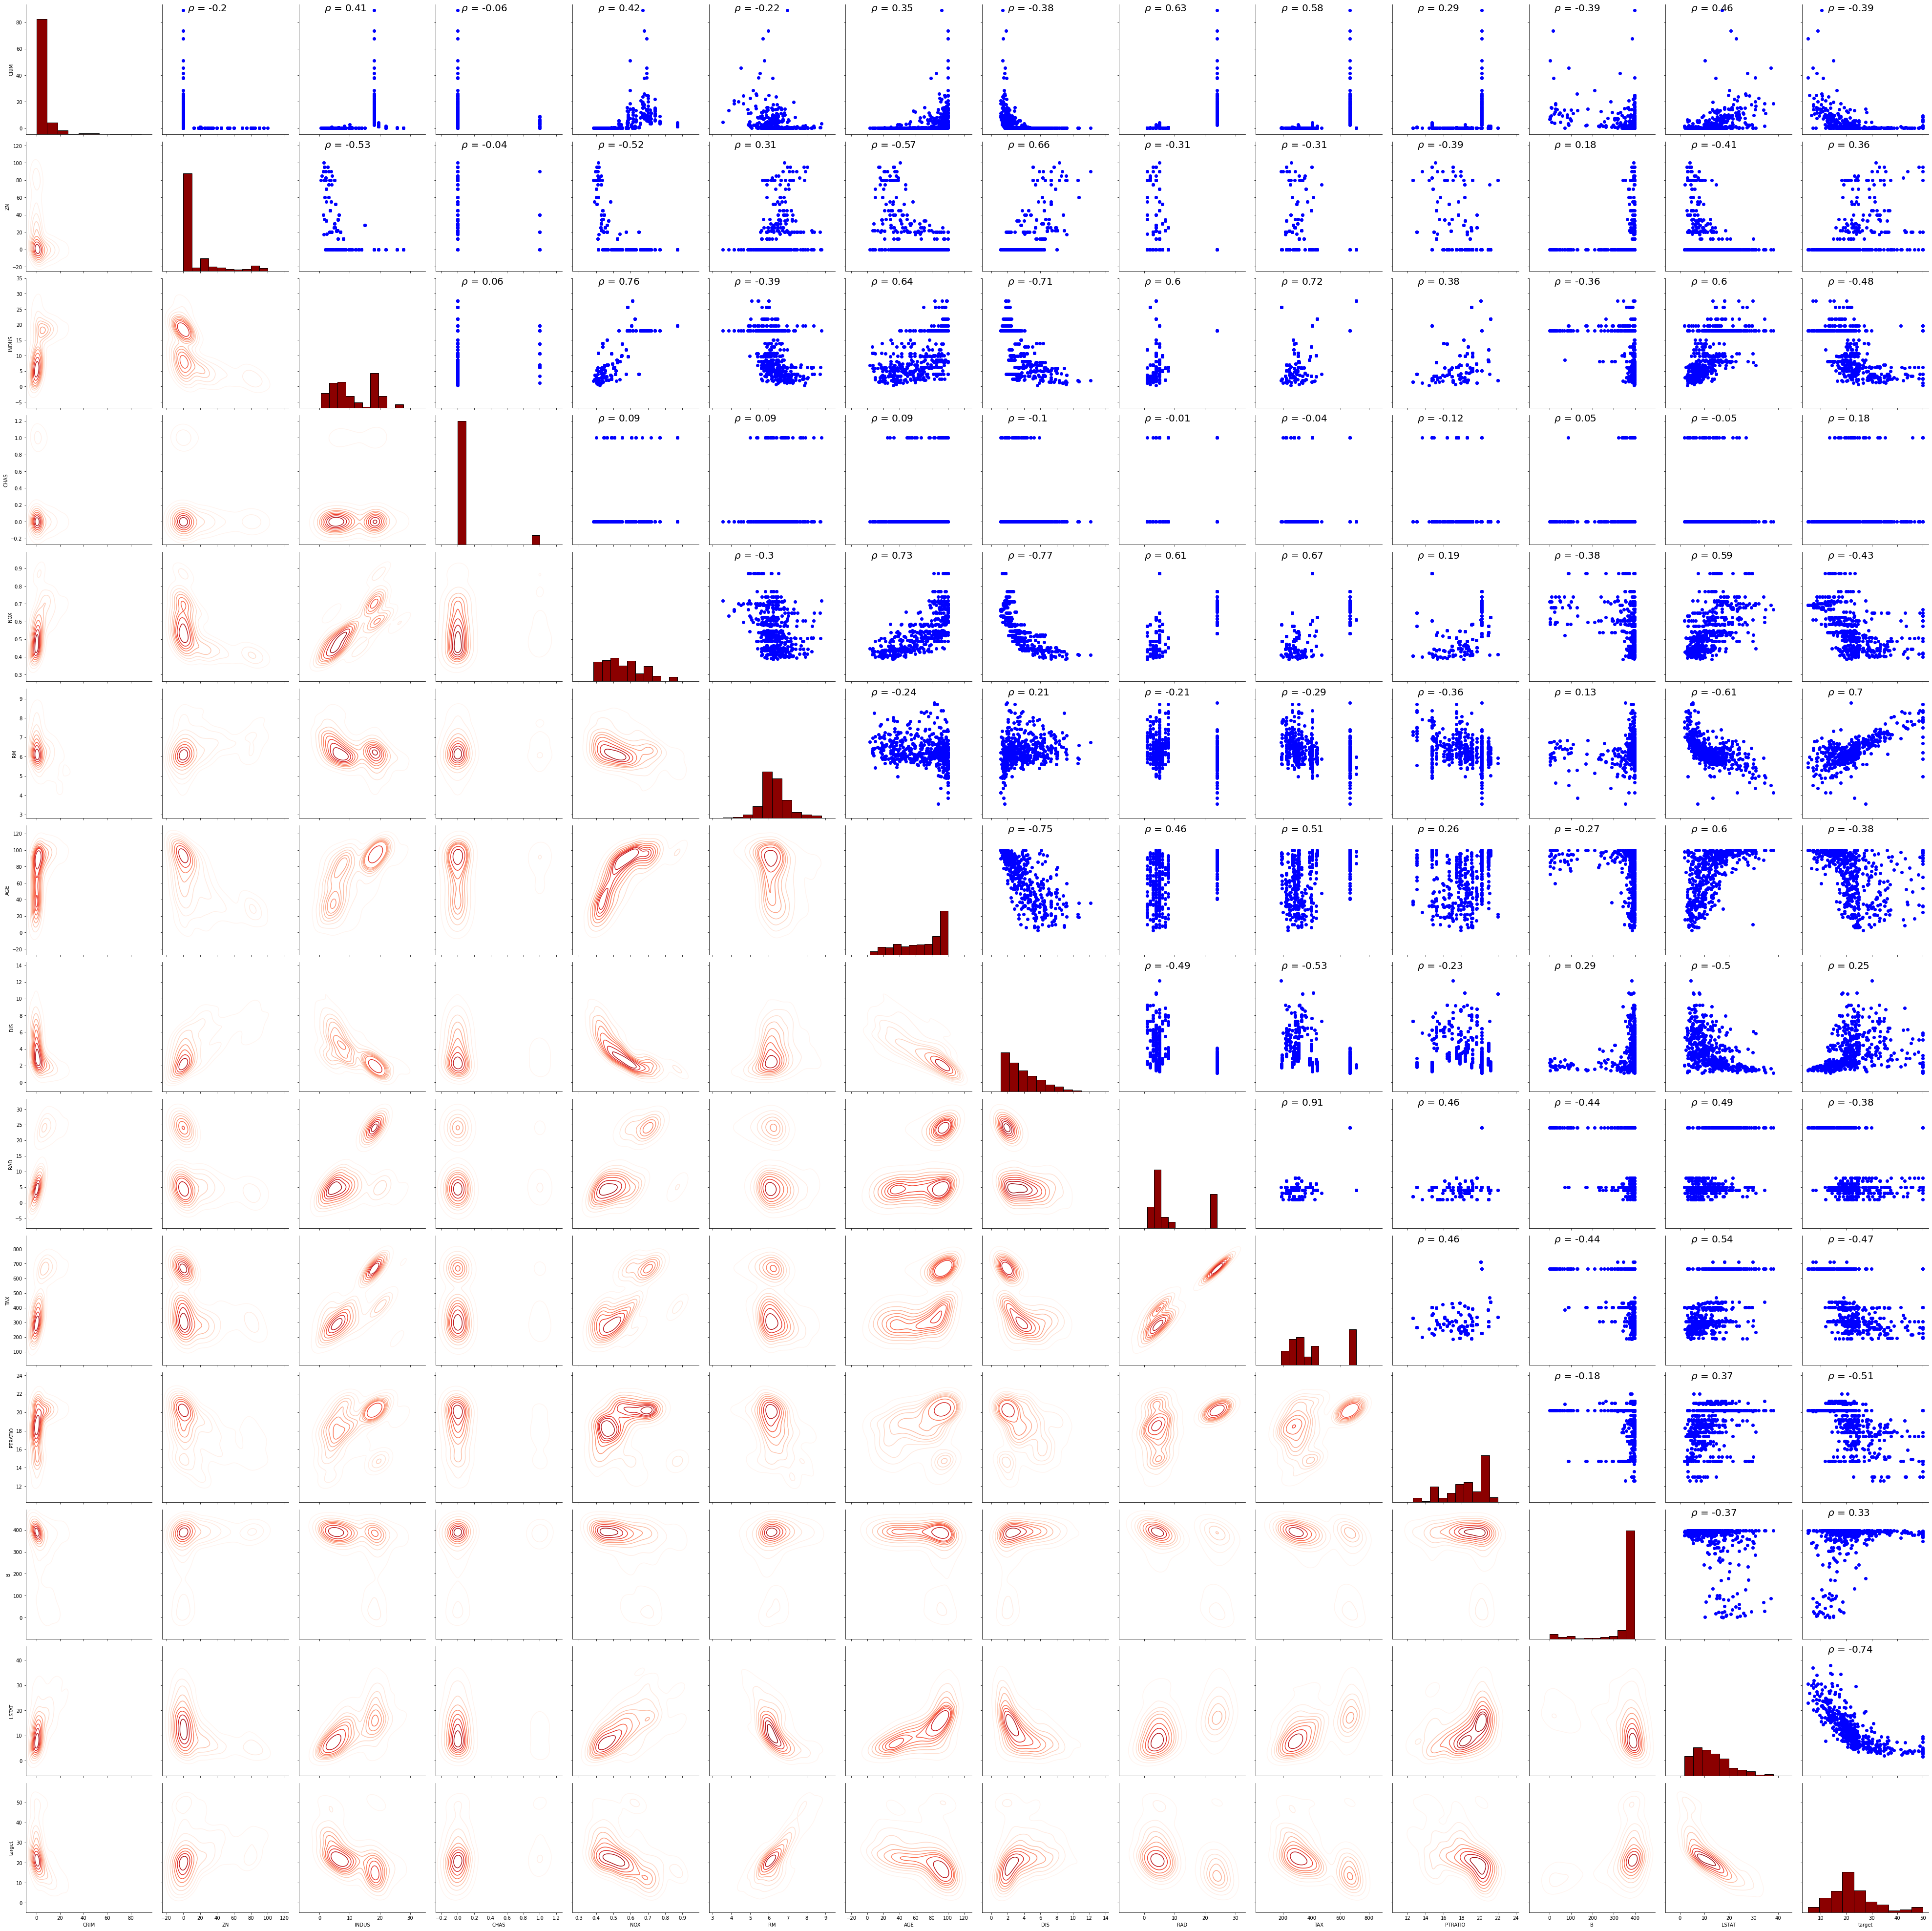

In [50]:
plot_pair(df)

In [51]:
df.describe(include='all').T

count        mean         std        min         25%        50%  \
CRIM     506.0    3.613524    8.601545    0.00632    0.082045    0.25651   
ZN       506.0   11.363636   23.322453    0.00000    0.000000    0.00000   
INDUS    506.0   11.136779    6.860353    0.46000    5.190000    9.69000   
CHAS     506.0    0.069170    0.253994    0.00000    0.000000    0.00000   
NOX      506.0    0.554695    0.115878    0.38500    0.449000    0.53800   
RM       506.0    6.284634    0.702617    3.56100    5.885500    6.20850   
AGE      506.0   68.574901   28.148861    2.90000   45.025000   77.50000   
DIS      506.0    3.795043    2.105710    1.12960    2.100175    3.20745   
RAD      506.0    9.549407    8.707259    1.00000    4.000000    5.00000   
TAX      506.0  408.237154  168.537116  187.00000  279.000000  330.00000   
PTRATIO  506.0   18.455534    2.164946   12.60000   17.400000   19.05000   
B        506.0  356.674032   91.294864    0.32000  375.377500  391.44000   
LSTAT    506.0   12.653063    7.141062    1.73000    6.950000   11.36000   
target   506.0   22.532806    9.197104    5.00000   17.025000   21.20000   

                75%       max  
CRIM       3.677083   88.9762  
ZN        12.500000  100.0000  
INDUS     18.100000   27.7400  
CHAS       0.000000    1.0000  
NOX        0.624000    0.8710  
RM         6.623500    8.7800  
AGE       94.075000  100.0000  
DIS        5.188425   12.1265  
RAD       24.000000   24.0000  
TAX      666.000000  711.0000  
PTRATIO   20.200000   22.0000  
B        396.225000  396.9000  
LSTAT     16.955000   37.9700  
target    25.000000   50.0000

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=234)


In [53]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [54]:
from sklearn.linear_model import LinearRegression
rgr = LinearRegression()

rgr.fit(X_train, y_train)
y_pred = rgr.predict(X_test)

In [55]:
rgr.coef_

array([-0.84999645,  1.22742053,  0.31807804,  0.94484166, -2.21744939,
        2.05680318, -0.01991784, -3.22712643,  2.74616105, -1.80562058,
       -1.85814233,  0.85047504, -4.22120511])

In [56]:
# evaluate regressor performance https://scikit-learn.org/0.16/modules/model_evaluation.html#regression-metrics

from sklearn.metrics import mean_absolute_error, explained_variance_score, mean_squared_error, r2_score

r2_score(y_test, y_pred)

0.7783245955415927

In [57]:
mean_absolute_error(y_test, y_pred)

3.6191843426851267

Text(0, 0.5, 'predictions')

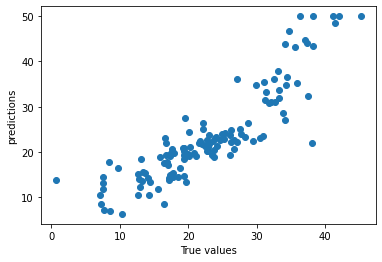

In [60]:
fig, ax = plt.subplots()
ax.scatter(y_pred, y_test)
ax.set_xlabel('True values')
ax.set_ylabel('predictions')

Text(0, 0.5, 'diff=truevalues-predictions')

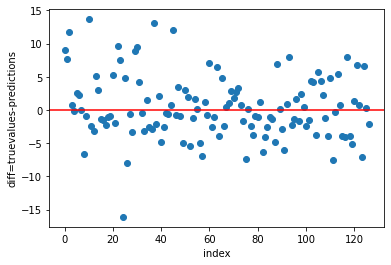

In [63]:
fig, ax = plt.subplots()
ax.scatter(list(range(len(y_pred))),  y_test-y_pred)
ax.axhline(y=0, c='red')
ax.set_xlabel('index')
ax.set_ylabel('diff=truevalues-predictions')

# HW
- do some research to understand what kind of metrics you should use for classification, regression and discuss it with your dad.

- for imbalanced classification problem, what kinds of metrics you should use? (Precision Recall curve > AUC-ORC curve > F1 > accuracy)

- what are hyper-parameters VS parameters? how do you set hyperparameters?